# Imports

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('..')
import medicc
import medicc.bootstrap

/Users/tom/miniconda3/envs/medicc_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%matplotlib inline

# Data loading

In [3]:
# By setting the numpy seed, the created bootstrap datasets will always be the same
# Comment this line out if you want to create different datasets each time the notebook is run
np.random.seed(42)

##%%
data_folder = os.path.join("../examples/output_gundem_et_al_2015")

main_tree = medicc.io.import_tree(os.path.join(data_folder, "PTX011_final_tree.new"), 'diploid')
main_df = medicc.io.read_and_parse_input_data(os.path.join(data_folder, "PTX011_final_cn_profiles.tsv"))

# remove internal nodes from df
main_df = main_df.loc[main_df.index.get_level_values('sample_id').map(lambda x: 'internal' not in x)]

labels = {'diploid': 'Diploid'}
for label in main_df.reset_index()['sample_id']:
    if 'diploid' not in label and 'internal' not in label:
        labels[label] = '_'.join([label.split('_')[1].split('-')[0], label.split('_')[-1]])


2024-08-13 15:54:57,818 - WARNING medicc.io:	Total of 1.4e+08 bp gaps in the segmentation. Large gaps might affect the performance of MEDICC2.


# Run

## chromosome-wise bootstrap

In [4]:
N_bootstrap = 20

bootstrap_trees_df, support_tree = medicc.bootstrap.run_bootstrap(main_df, main_tree, N_bootstrap=N_bootstrap, 
                                                                  method='chr-wise', normal_name='diploid',)

print('{} chromosome-wise bootstrap datasets created'.format(N_bootstrap))
print('{} individual trees'.format(len(bootstrap_trees_df)))
print('The original tree was recreated {} times ({:.1f}%)'.format(bootstrap_trees_df.loc[bootstrap_trees_df['note'] == 'original', 'count'].iloc[0],
                                                                  100*bootstrap_trees_df.loc[bootstrap_trees_df['note'] == 'original', 'freq'].iloc[0]))


100%|██████████| 20/20 [00:10<00:00,  1.91it/s]

20 chromosome-wise bootstrap datasets created
6 individual trees
The original tree was recreated 5 times (25.0%)


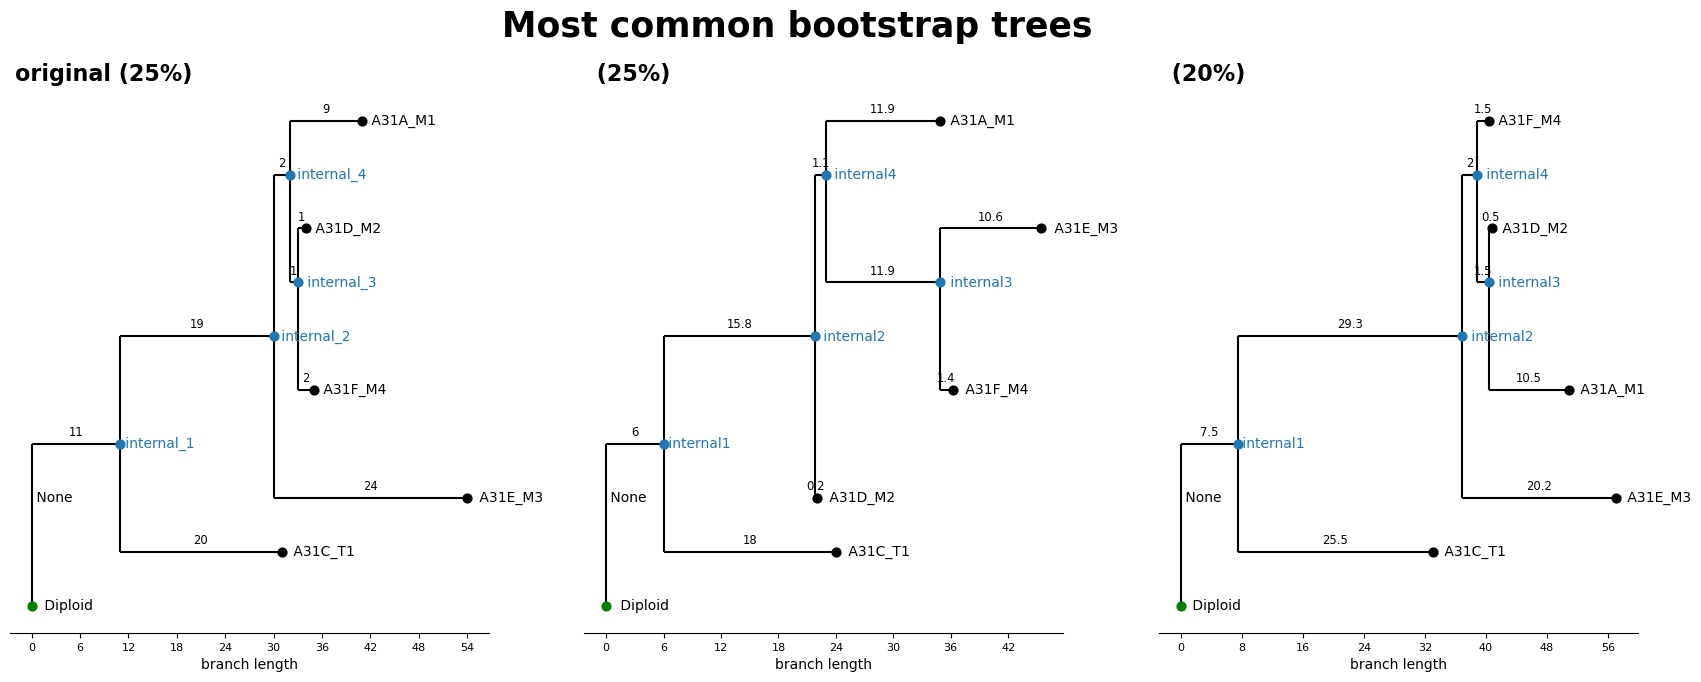

In [5]:
##%% Show the most prominent trees
fig, axs = plt.subplots(figsize=(21, 7), ncols=3)
for ax, (i, row) in zip(axs, bootstrap_trees_df.iterrows()):
    medicc.plot.plot_tree(row['tree'], 
                          label_func=lambda label: labels.get(label, label),
                          ax=ax,
                          title='{} ({:.0f}%)'.format(row['note'], 100*row['freq']))

fig.suptitle('Most common bootstrap trees', y=1.0, fontsize=25, weight='bold')
plt.show()


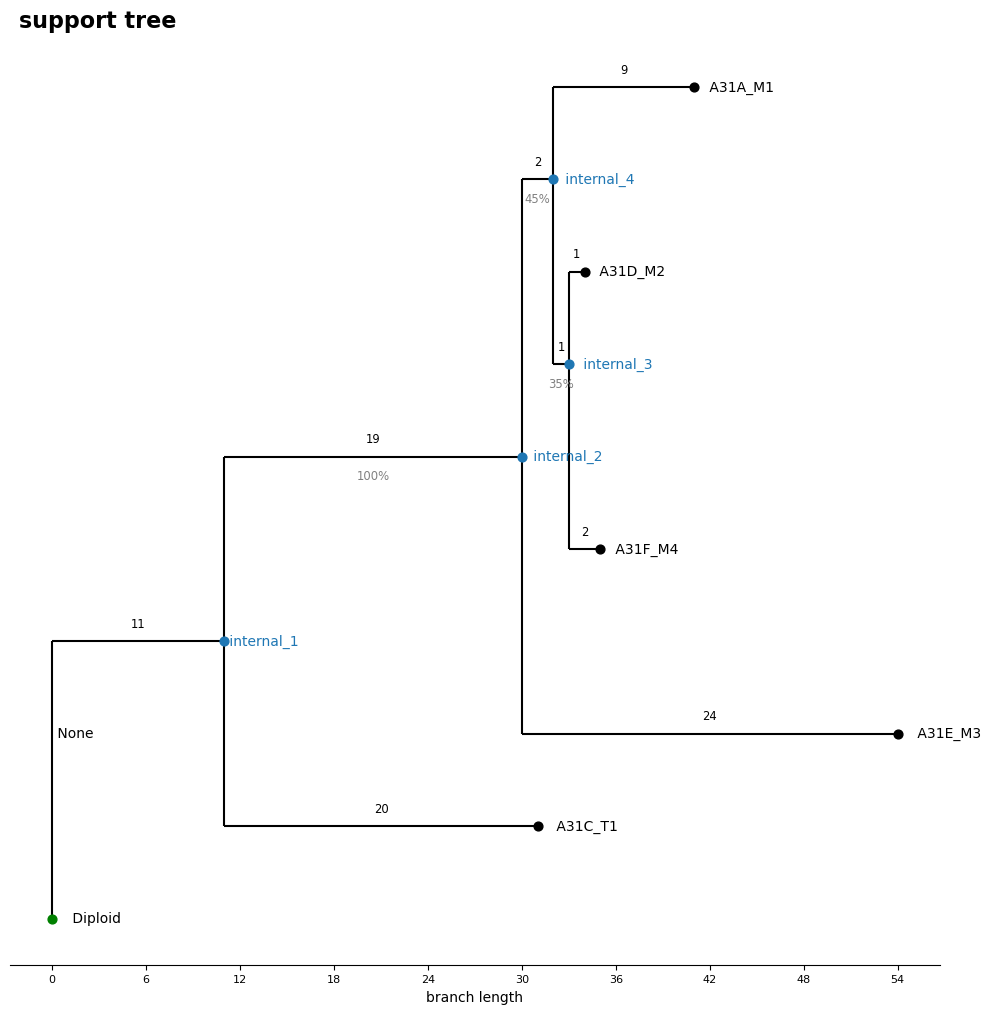

In [6]:
##%% Show the support for the individual branches of the main tree
fig, ax = plt.subplots(figsize=(12, 12))
fig = medicc.plot.plot_tree(support_tree,
                            title='support tree',
                            label_func=lambda label: labels.get(label, label),
                            show_branch_lengths=True,
                            show_branch_support=True,
                            ax=ax)
plt.show()



## segment-wise jackknife

In [7]:
N_bootstrap = 20

bootstrap_trees_df, support_tree = medicc.bootstrap.run_bootstrap(main_df, main_tree,
                                                                  N_bootstrap=N_bootstrap, method='segment-wise')

print('{} segment-wise jackknife datasets created'.format(N_bootstrap))
print('{} individual trees'.format(len(bootstrap_trees_df)))
print('The original tree was recreated {} times ({:.1f}%)'.format(bootstrap_trees_df.loc[bootstrap_trees_df['note'] == 'original', 'count'].iloc[0],
                                                                  100*bootstrap_trees_df.loc[bootstrap_trees_df['note'] == 'original', 'freq'].iloc[0]))


100%|██████████| 20/20 [00:05<00:00,  3.36it/s]

20 segment-wise jackknife datasets created
6 individual trees
The original tree was recreated 5 times (25.0%)
